# MTA Ridership Analysis

This notebook is intended for analysis of the Metro Transit Authority dataset which contains ridership metrics across 7 different transit options.
There are 2 columns for each commute option, one for pre pandemic metrics and another for post-pandemic metrics.

Analyis conducted: -
1. Distribution Analysis of each transit option via a histogram.
2. Comparison of each transit with its pre pandemic day using line charts.
3. Correlation heatmap.
4. Total Ridership comparison via pie charts.
5. Revenue Comparison between transit options
6. Time series analysis

The dataset is obtained from the Maven Commute Challenge - https://mavenanalytics.io/challenges/maven-commuter-challenge/2300490c-532e-4f34-87a3-a47c83351164

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pygwalker
import pygwalker as pyg
import plotly.graph_objects as go
from prophet.plot import plot_plotly, plot_components_plotly
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
!pip install prophet
from prophet import Prophet

In [130]:
df = pd.read_csv('MTA_Daily_Ridership.csv', index_col = 'Date', parse_dates = True)

In [131]:
df.describe()

Subways: Total Estimated Ridership  \
count                        1.706000e+03   
mean                         2.509055e+06   
std                          1.062184e+06   
min                          1.983990e+05   
25%                          1.715396e+06   
50%                          2.459607e+06   
75%                          3.440053e+06   
max                          5.498809e+06   

       Subways: % of Comparable Pre-Pandemic Day  \
count                                1706.000000   
mean                                   55.461313   
std                                    19.819596   
min                                     7.000000   
25%                                    40.000000   
50%                                    61.000000   
75%                                    69.000000   
max                                   143.000000   

       Buses: Total Estimated Ridership  \
count                      1.706000e+03   
mean                       1.006868e+06   
std                        4.403799e+05   
min                        5.498000e+03   
25%                        7.152495e+05   
50%                        1.140776e+06   
75%                        1.347620e+06   
max                        2.244515e+06   

       Buses: % of Comparable Pre-Pandemic Day  \
count                              1706.000000   
mean                                 54.692849   
std                                  19.293307   
min                                   1.000000   
25%                                  53.000000   
50%                                  60.000000   
75%                                  65.000000   
max                                 126.000000   

       LIRR: Total Estimated Ridership  \
count                      1706.000000   
mean                     135960.116061   
std                       71298.778711   
min                        1903.000000   
25%                       78689.750000   
50%                      124274.000000   
75%                      197928.000000   
max                      321569.000000   

       LIRR: % of Comparable Pre-Pandemic Day  \
count                             1706.000000   
mean                                59.128370   
std                                 29.297993   
min                                  2.000000   
25%                                 37.000000   
50%                                 60.000000   
75%                                 76.000000   
max                                237.000000   

       Metro-North: Total Estimated Ridership  \
count                             1706.000000   
mean                            114888.273154   
std                              66500.207696   
min                               3281.000000   
25%                              51271.250000   
50%                             108237.000000   
75%                             176789.750000   
max                             249585.000000   

       Metro-North: % of Comparable Pre-Pandemic Day  \
count                                    1706.000000   
mean                                       51.083236   
std                                        26.137311   
min                                         3.000000   
25%                                        29.000000   
50%                                        56.000000   
75%                                        71.000000   
max                                       193.000000   

       Access-A-Ride: Total Scheduled Trips  \
count                           1706.000000   
mean                           21941.532825   
std                             7990.634806   
min                             2506.000000   
25%                            15869.500000   
50%                            22301.500000   
75%                            27506.750000   
max                            40468.000000   

       Access-A-Ride: % of Comparable Pre-Pandemic Day  \
count                                      

In [132]:
df.duplicated().sum()

0

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1706 entries, 2020-03-01 to 2024-10-31
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   Subways: Total Estimated Ridership                       1706 non-null   int64
 1   Subways: % of Comparable Pre-Pandemic Day                1706 non-null   int64
 2   Buses: Total Estimated Ridership                         1706 non-null   int64
 3   Buses: % of Comparable Pre-Pandemic Day                  1706 non-null   int64
 4   LIRR: Total Estimated Ridership                          1706 non-null   int64
 5   LIRR: % of Comparable Pre-Pandemic Day                   1706 non-null   int64
 6   Metro-North: Total Estimated Ridership                   1706 non-null   int64
 7   Metro-North: % of Comparable Pre-Pandemic Day            1706 non-null   int64
 8   Access-A-Ride: Total Scheduled

In [134]:
df.shape

(1706, 14)

In [135]:
df.columns

Index(['Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day'],
      dtype='object')

### Histogram to understand ridership distribution

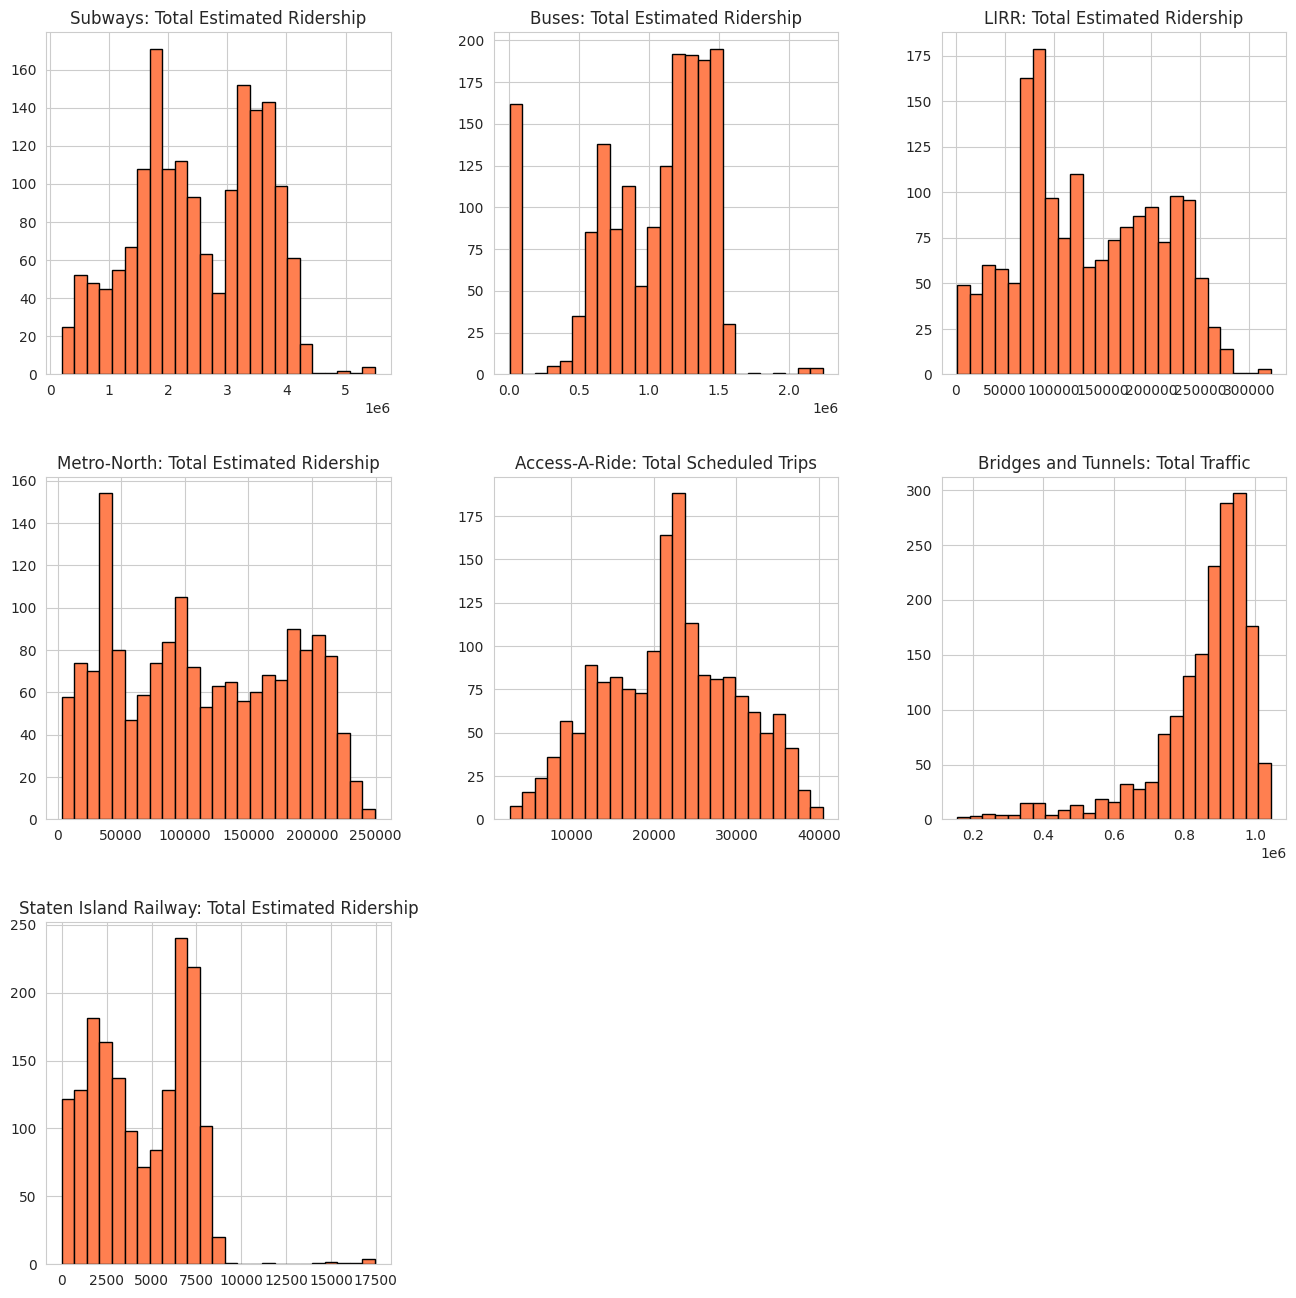

In [136]:
cols = list(df.columns)
df1 = df[cols[::2]]

ax =  df1.hist(bins=25, grid=True, figsize=(16,16), color='coral', edgecolor = 'black', zorder = 2)
ax = ax[0]
#for x in ax:
    # Despine
    #x.spines['right'].set_visible(False)
    #x.spines['top'].set_visible(False)
    #x.spines['left'].set_visible(False)

    # Draw horizontal axis lines
    #vals = x.get_yticks()
    #for tick in vals:
        #x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


-----
### Creating a dataframe with numerical values of pre pandemic measure for analysis

In [137]:
df1 = df.copy()
df1.rename(columns = {'Subways: % of Comparable Pre-Pandemic Day': 'Subways: Pre-Pandemic',
       'Buses: % of Comparable Pre-Pandemic Day': 'Buses: Pre-Pandemic',
       'LIRR: % of Comparable Pre-Pandemic Day': 'LIRR: Pre-Pandemic',
       'Metro-North: % of Comparable Pre-Pandemic Day': 'Metro-North: Pre-Pandemic',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day': 'Access-A-Ride: Pre-Pandemic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day': 'Bridge and Tunnels: Pre-Pandemic',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day': 'Staten Island Railway: Pre-Pandemic'}, inplace = True)

In [138]:
cols = np.arange(0,14,2)
cols

for i in cols:
  df1.iloc[:,i+1] = np.floor(df.iloc[:,i].astype('float64') * 100 / df.iloc[:,i+1].astype('float64'))

In [139]:
df1.head(5)

Subways: Total Estimated Ridership  Subways: Pre-Pandemic  \
Date                                                                    
2020-03-01                             2212965              2281407.0   
2020-03-02                             5329915              5551994.0   
2020-03-03                             5481103              5592962.0   
2020-03-04                             5498809              5554352.0   
2020-03-05                             5496453              5551972.0   

            Buses: Total Estimated Ridership  Buses: Pre-Pandemic  \
Date                                                                
2020-03-01                            984908             994856.0   
2020-03-02                           2209066            2231379.0   
2020-03-03                           2228608            2251119.0   
2020-03-04                           2177165            2244500.0   
2020-03-05                           2244515            2244515.0   

            LIRR: Total Estimated Ridership  LIRR: Pre-Pandemic  \
Date                                                              
2020-03-01                            86790             86790.0   
2020-03-02                           321569            312202.0   
2020-03-03                           319727            313457.0   
2020-03-04                           311662            314810.0   
2020-03-05                           307597            313874.0   

            Metro-North: Total Estimated Ridership  Metro-North: Pre-Pandemic  \
Date                                                                            
2020-03-01                                   55825                    94618.0   
2020-03-02                                  180701                   273789.0   
2020-03-03                                  190648                   276301.0   
2020-03-04                                  192689                   275270.0   
2020-03-05                                  194386                   277694.0   

            Access-A-Ride: Total Scheduled Trips  Access-A-Ride: Pre-Pandemic  \
Date                                                                            
2020-03-01                                 19922                      17630.0   
2020-03-02                                 30338                      29743.0   
2020-03-03                                 32767                      29788.0   
2020-03-04                                 34297                      29823.0   
2020-03-05                                 33209                      29650.0   

            Bridges and Tunnels: Total Traffic  \
Date                                             
2020-03-01                              786960   
2020-03-02                              874619   
2020-03-03                              882175   
2020-03-04                              905558   
2020-03-05                              929298   

            Bridge and Tunnels: Pre-Pandemic  \
Date                                           
2020-03-01                          803020.0   
2020-03-02                          920651.0   
2020-03-03                          918932.0   
2020-03-04                          924038.0   
2020-03-05                          920097.0   

            Staten Island Railway: Total Estimated Ridership  \
Date                                                           
2020-03-01                                              1636   
2020-03-02                                             17140   
2020-03-03                                             17453   
2020-03-04                                             17136   
2020-03-05                                             17203   

            Staten Island Railway: Pre-Pandemic  
Date                                             
2020-03-01                               3146.0  
2020-03-02                              16018.0  
2020-03-03                              16011.0  
2020-03-04             

In [140]:
df.head(5)

Subways: Total Estimated Ridership  \
Date                                             
2020-03-01                             2212965   
2020-03-02                             5329915   
2020-03-03                             5481103   
2020-03-04                             5498809   
2020-03-05                             5496453   

            Subways: % of Comparable Pre-Pandemic Day  \
Date                                                    
2020-03-01                                         97   
2020-03-02                                         96   
2020-03-03                                         98   
2020-03-04                                         99   
2020-03-05                                         99   

            Buses: Total Estimated Ridership  \
Date                                           
2020-03-01                            984908   
2020-03-02                           2209066   
2020-03-03                           2228608   
2020-03-04                           2177165   
2020-03-05                           2244515   

            Buses: % of Comparable Pre-Pandemic Day  \
Date                                                  
2020-03-01                                       99   
2020-03-02                                       99   
2020-03-03                                       99   
2020-03-04                                       97   
2020-03-05                                      100   

            LIRR: Total Estimated Ridership  \
Date                                          
2020-03-01                            86790   
2020-03-02                           321569   
2020-03-03                           319727   
2020-03-04                           311662   
2020-03-05                           307597   

            LIRR: % of Comparable Pre-Pandemic Day  \
Date                                                 
2020-03-01                                     100   
2020-03-02                                     103   
2020-03-03                                     102   
2020-03-04                                      99   
2020-03-05                                      98   

            Metro-North: Total Estimated Ridership  \
Date                                                 
2020-03-01                                   55825   
2020-03-02                                  180701   
2020-03-03                                  190648   
2020-03-04                                  192689   
2020-03-05                                  194386   

            Metro-North: % of Comparable Pre-Pandemic Day  \
Date                                                        
2020-03-01                                             59   
2020-03-02                                             66   
2020-03-03                                             69   
2020-03-04                                             70   
2020-03-05                                             70   

            Access-A-Ride: Total Scheduled Trips  \
Date                                               
2020-03-01                                 19922   
2020-03-02                                 30338   
2020-03-03                                 32767   
2020-03-04                                 34297   
2020-03-05                                 33209   

            Access-A-Ride: % of Comparable Pre-Pandemic Day  \
Date                                                          
2020-03-01                                              113   
2020-03-02                                              102   
2020-03-03                                              110   
2020-03-04                                              115   
2020-03-05                                              112   

            Bridges and Tunnels: Total Traffic  \
Date                                             
2020-03-01                              786960   
2020-03-02                              874619   
2020-03-03     

In [141]:
#Checking for infinity values
df1.loc[df1['Staten Island Railway: Pre-Pandemic'] == np.inf].head()

Subways: Total Estimated Ridership  Subways: Pre-Pandemic  \
Date                                                                    
2020-05-30                              426737              3282592.0   
2020-05-31                              344426              2460185.0   
2020-06-06                              464198              3315700.0   
2020-06-13                              545316              3207741.0   
2020-06-14                              430439              2690243.0   

            Buses: Total Estimated Ridership  Buses: Pre-Pandemic  \
Date                                                                
2020-05-30                              9112             911200.0   
2020-05-31                              6724             672400.0   
2020-06-06                              8912             891200.0   
2020-06-13                             12115            1211500.0   
2020-06-14                              8731             873100.0   

            LIRR: Total Estimated Ridership  LIRR: Pre-Pandemic  \
Date                                                              
2020-05-30                            15557            119669.0   
2020-05-31                            13554             96814.0   
2020-06-06                            18090            120600.0   
2020-06-13                            25355            120738.0   
2020-06-14                            20859             99328.0   

            Metro-North: Total Estimated Ridership  Metro-North: Pre-Pandemic  \
Date                                                                            
2020-05-30                                   11003                   157185.0   
2020-05-31                                    9390                   104333.0   
2020-06-06                                   12179                   152237.0   
2020-06-13                                   16675                   151590.0   
2020-06-14                                   13794                   106107.0   

            Access-A-Ride: Total Scheduled Trips  Access-A-Ride: Pre-Pandemic  \
Date                                                                            
2020-05-30                                  6143                      17551.0   
2020-05-31                                  4216                      16864.0   
2020-06-06                                  6591                      17344.0   
2020-06-13                                  7794                      17320.0   
2020-06-14                                  5195                      17913.0   

            Bridges and Tunnels: Total Traffic  \
Date                                             
2020-05-30                              537179   
2020-05-31                              495487   
2020-06-06                              551793   
2020-06-13                              631064   
2020-06-14                              563725   

            Bridge and Tunnels: Pre-Pandemic  \
Date                                           
2020-05-30                          959248.0   
2020-05-31                          854287.0   
2020-06-06                          985344.0   
2020-06-13                          986037.0   
2020-06-14                          924139.0   

            Staten Island Railway: Total Estimated Ridership  \
Date                                                           
2020-05-30                                                18   
2020-05-31                                                 2   
2020-06-06                                                 9   
2020-06-13                                                17   
2020-06-14                                                 7   

            Staten Island Railway: Pre-Pandemic  
Date                                             
2020-05-30                                  inf  
2020-05-31                                  inf  
2020-06-06                                  inf  
2020-06-13             

In [142]:
#Replacing infinity values with 0, to reduce errors
df1['Staten Island Railway: Pre-Pandemic'].replace(np.inf, 0, inplace = True)

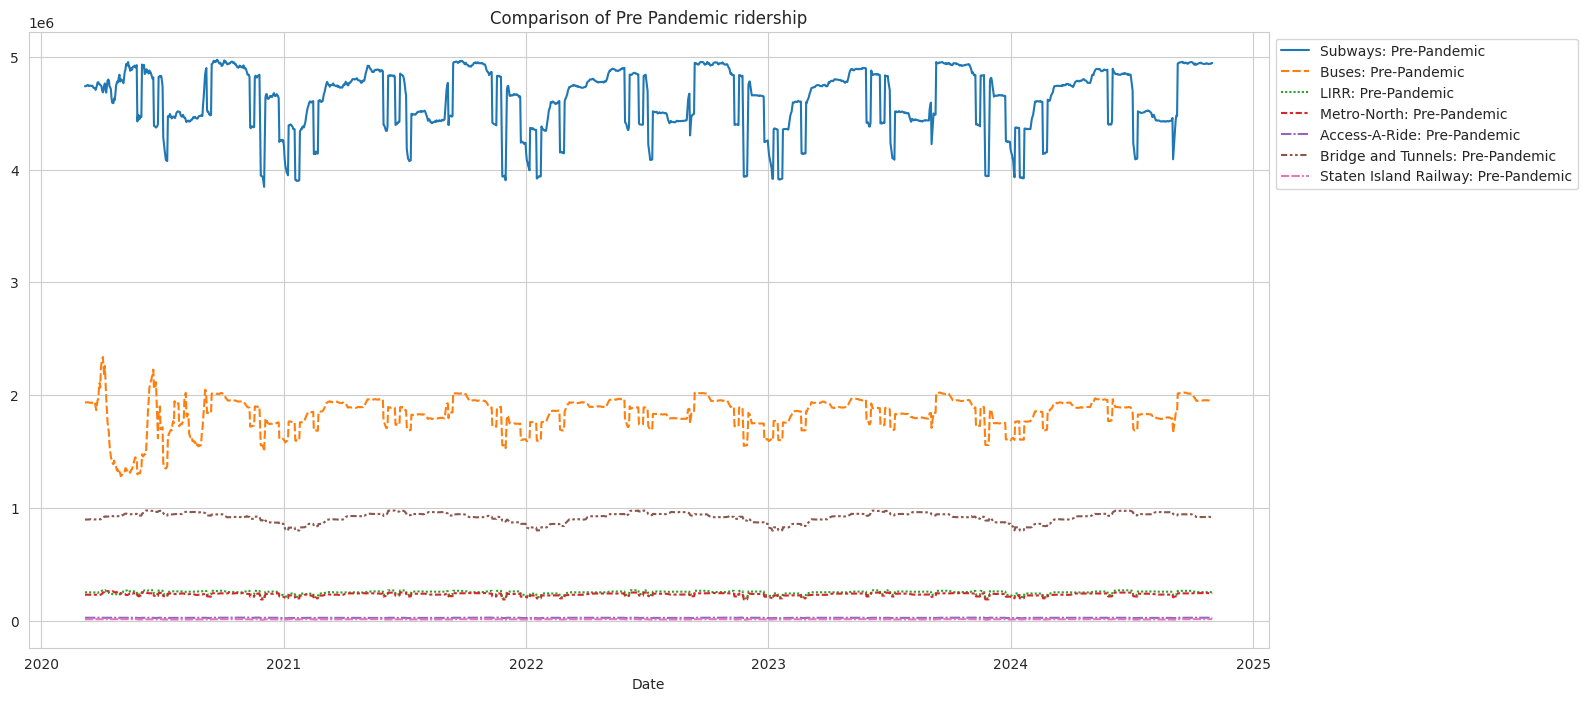

In [143]:
#Comparing Pre pandemic ridership of all the options
cols = list(df1.columns)
df2 = pd.DataFrame()
for i in cols[1::2]:
  df2[i] = df1[i].rolling(7).mean()

plt.figure(figsize = (16, 8))
ax = sns.lineplot(data=df2[6:])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Comparison of Pre Pandemic ridership")
plt.show()

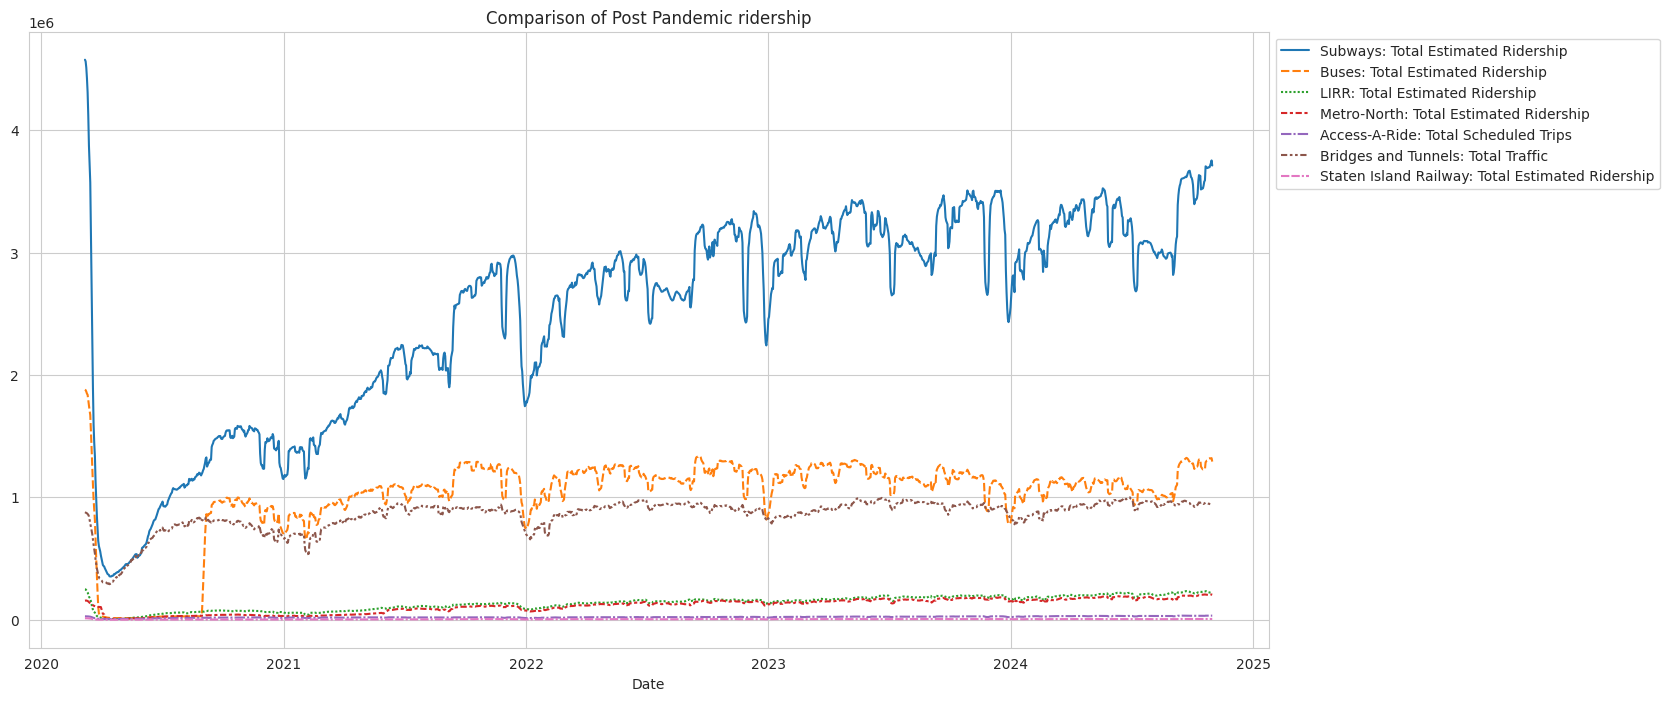

In [144]:
#Comparing Post pandemic ridership of all the options
cols = list(df1.columns)
df2 = pd.DataFrame()
for i in cols[::2]:
  df2[i] = df1[i].rolling(7).mean()
plt.figure(figsize = (16, 8))
ax = sns.lineplot(data=df2[6:])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Comparison of Post Pandemic ridership")
plt.show()

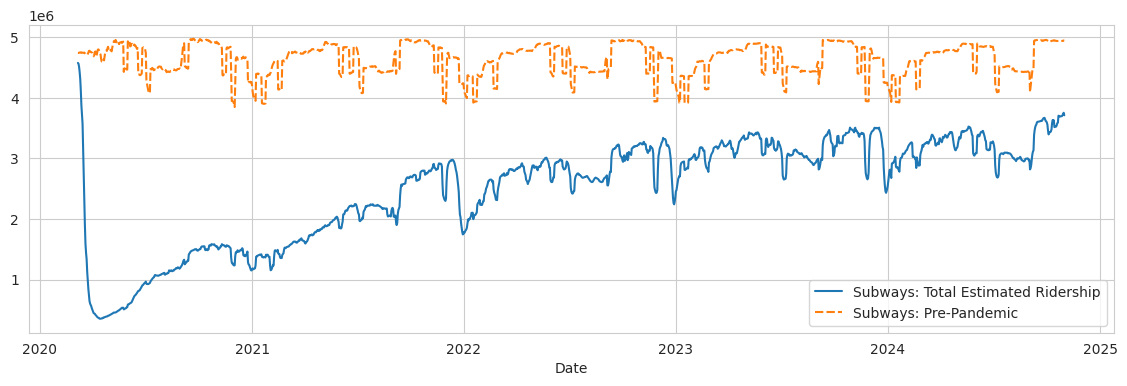

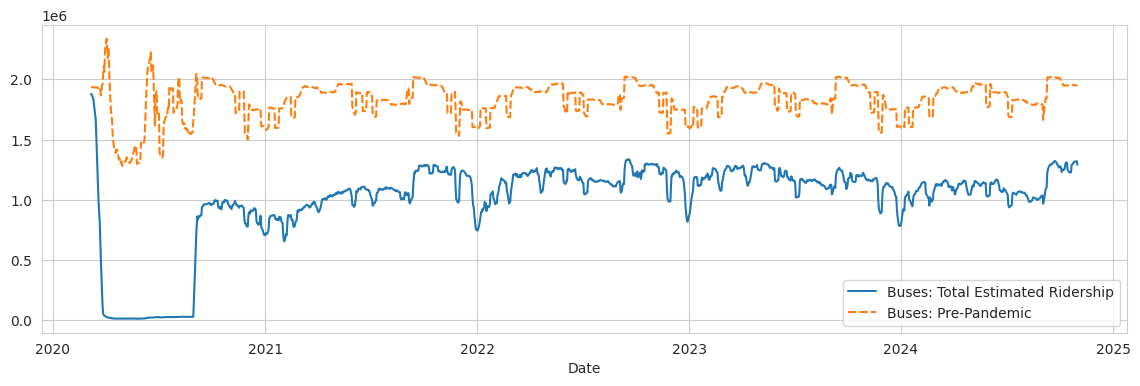

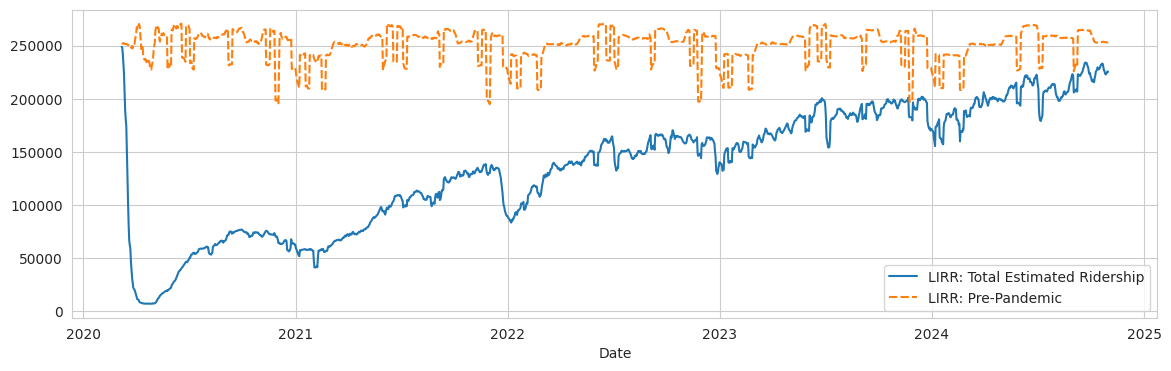

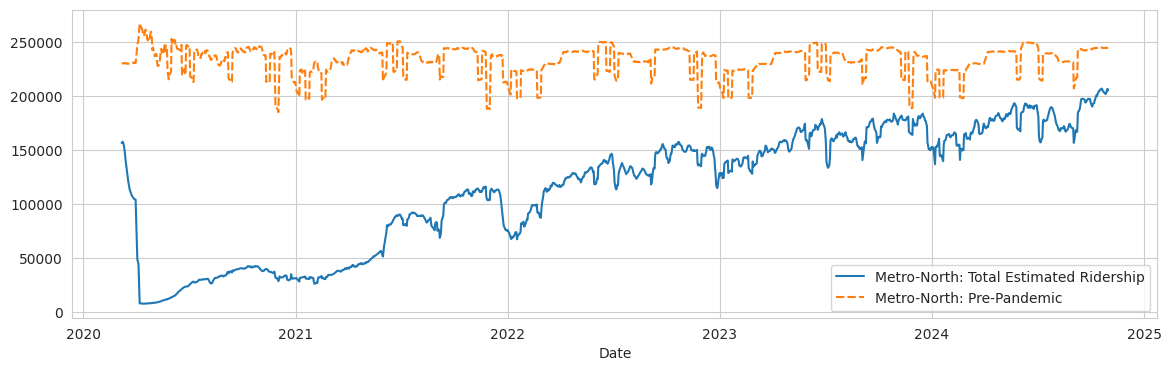

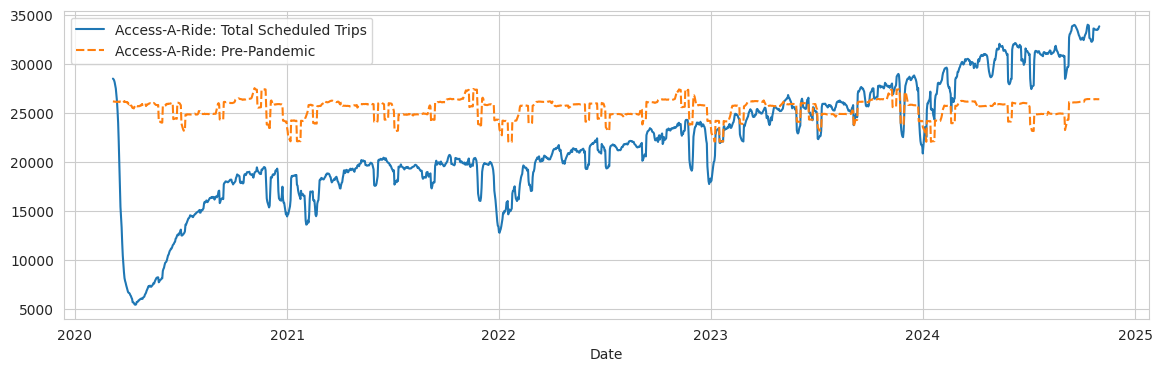

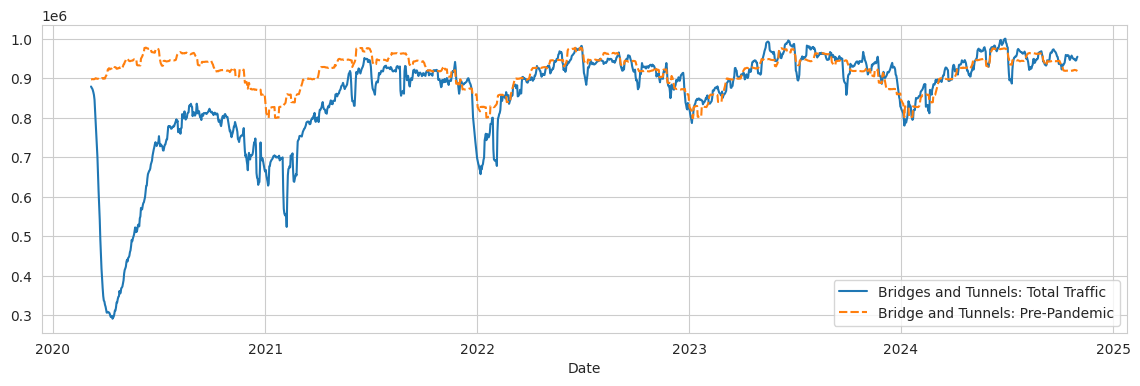

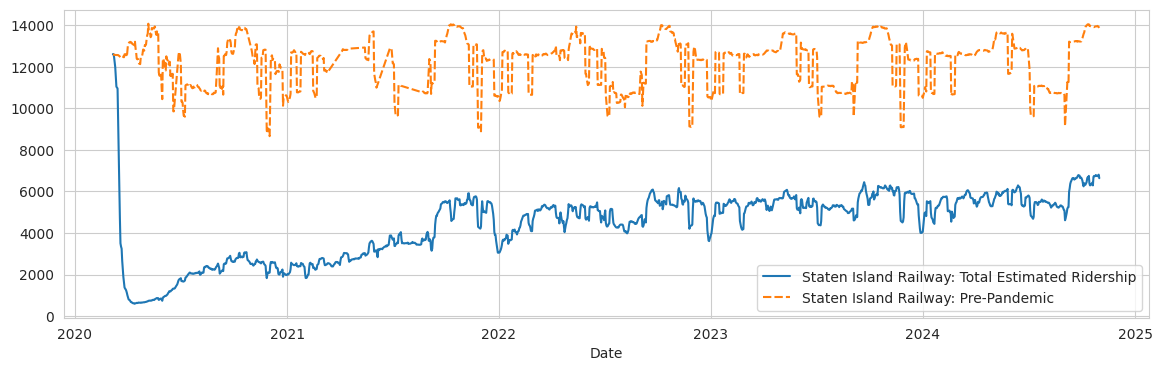

In [145]:
#Lineplot for comparison of each transit method with the pre pandemic measures
columns = df1.columns
df_rolling = df1.copy()
for i in columns:
  df_rolling[i] = df1[i].rolling(7).mean()

cols = np.arange(0,14,2)
cols
for i in cols:
  plt.figure(figsize = (14, 4))
  sns.lineplot(data=df_rolling.iloc[6:,[i, i+1]])

plt.show()

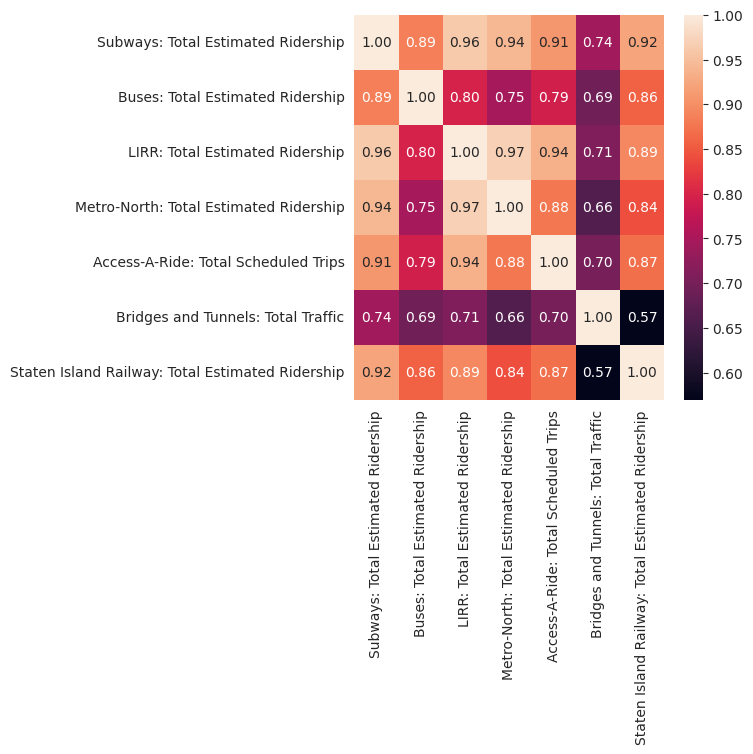

In [146]:
#Correlation heatmap of post pandemic ridership metrics
plt.figure(figsize = (5,5))
sns.heatmap(data = df1.iloc[:, ::2].corr(), annot = True, fmt = '.2f')
plt.show()

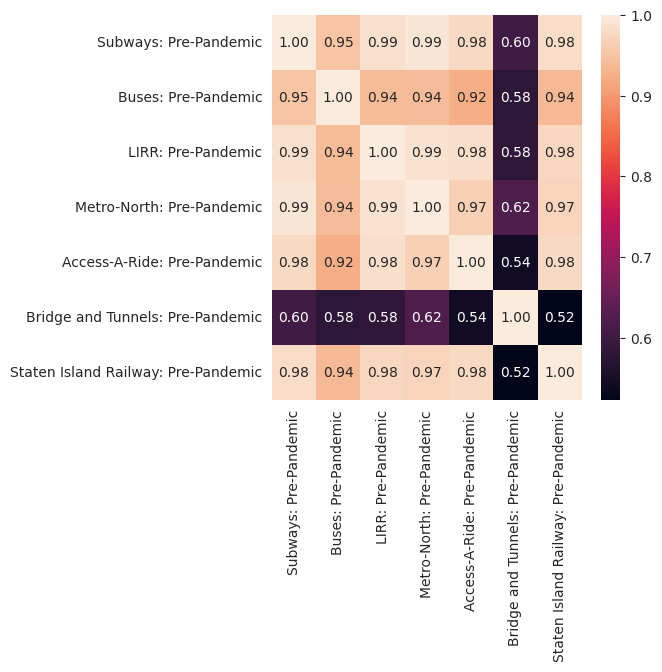

In [147]:
#Correlation heatmap of post pandemic ridership metrics
plt.figure(figsize = (5,5))
sns.heatmap(data = df1.iloc[:, 1::2].corr(), annot = True, fmt = '.2f')
plt.show()

In [148]:
#Total Ridership Comparison Post Pandemic (2024 only)
df_total = df1.copy()
df_total = df_total.loc[df_total.index>='2024-01-01']

df_total1 = df_total.sum()
fig = go.Figure(data=[go.Pie(labels=['Subways',
       'Buses',
       'LIRR',
       'Metro-North',
       'Access-A-Ride',
       'Bridges and Tunnels',
       'Staten Island Railway'], values=df_total1[::2])])

fig.update_traces(textinfo='label+percent',textfont_size=16,
                  marker=dict(line=dict(color='#000000', width=1)), hole =0.4)

fig.update_layout(title_text="Post-Pandemic Ridership Distribution")
fig.show()

In [149]:
#Total Ridership Comparison - Pre Pandemic
import plotly.graph_objects as go
df_total = df1.sum()
fig = go.Figure(data=[go.Pie(labels=['Subways',
       'Buses',
       'LIRR',
       'Metro-North',
       'Access-A-Ride',
       'Bridges and Tunnels',
       'Staten Island Railway'], values=df_total[1::2])])

fig.update_traces(textinfo='label+percent',textfont_size=16,
                  marker=dict(line=dict(color='#000000', width=1)), hole =0.4)

fig.update_layout(title_text="Pre-Pandemic Ridership Distribution")
fig.show()

-----
### Prices Comparison

In [150]:
df1.columns

Index(['Subways: Total Estimated Ridership', 'Subways: Pre-Pandemic',
       'Buses: Total Estimated Ridership', 'Buses: Pre-Pandemic',
       'LIRR: Total Estimated Ridership', 'LIRR: Pre-Pandemic',
       'Metro-North: Total Estimated Ridership', 'Metro-North: Pre-Pandemic',
       'Access-A-Ride: Total Scheduled Trips', 'Access-A-Ride: Pre-Pandemic',
       'Bridges and Tunnels: Total Traffic',
       'Bridge and Tunnels: Pre-Pandemic',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: Pre-Pandemic'],
      dtype='object')

In [151]:
#Creating a Dataframe with only the ticket sales amount
#Methodology - The minimum fare for each transit has been covered, since there are no options to determine the actual sales.
#Fares and costs obtained from the MTA website
df_prices = df1.copy()
df_prices[['Access-A-Ride: Total Scheduled Trips','Access-A-Ride: Pre-Pandemic']] = df_prices[['Access-A-Ride: Total Scheduled Trips','Access-A-Ride: Pre-Pandemic']] * 2.90

In [152]:
#For LIRR a CityTicket was considered during non rush hours, amounting to 5 Dollars.
df_prices[['LIRR: Total Estimated Ridership','LIRR: Pre-Pandemic']] = df_prices[['LIRR: Total Estimated Ridership','LIRR: Pre-Pandemic']] * 5

In [153]:
#Bus fare $2.90
df_prices[['Buses: Total Estimated Ridership','Buses: Pre-Pandemic']] = df_prices[['Buses: Total Estimated Ridership','Buses: Pre-Pandemic']] * 2.90

In [154]:
#Subway Fare $2.90
df_prices[['Subways: Total Estimated Ridership','Subways: Pre-Pandemic']] = df_prices[['Subways: Total Estimated Ridership','Subways: Pre-Pandemic']] * 2.90

In [155]:
#Bridges and Tunnel Fair taken to be $6.94, the base toll for cars.
df_prices[[ 'Bridges and Tunnels: Total Traffic','Bridge and Tunnels: Pre-Pandemic']] = df_prices[[ 'Bridges and Tunnels: Total Traffic','Bridge and Tunnels: Pre-Pandemic']] * 6.94

In [156]:
#For Metro North, a CityTicket was considered during non rush hours, amounting to 5 Dollars.
df_prices[['Metro-North: Total Estimated Ridership', 'Metro-North: Pre-Pandemic']] = df_prices[['Metro-North: Total Estimated Ridership', 'Metro-North: Pre-Pandemic']] * 5

In [157]:
#SIR Fare $2.90
df_prices[[ 'Staten Island Railway: Total Estimated Ridership','Staten Island Railway: Pre-Pandemic']] = df_prices[['Staten Island Railway: Total Estimated Ridership','Staten Island Railway: Pre-Pandemic']] * 2.90

In [158]:
df_prices.rename(columns = {
    'Subways: Total Estimated Ridership': 'Subways Sales Post-Pandemic',
    'Subways: Pre-Pandemic':'Subways Sales Pre-Pandemic',
    'Buses: Total Estimated Ridership':'Buses Sales Post-Pandemic',
    'Buses: Pre-Pandemic':'Buses Sales Pre-Pandemic',
    'LIRR: Total Estimated Ridership':'LIRR Sales Post-Pandemic',
    'LIRR: Pre-Pandemic':'LIRR Sales Pre-Pandemic',
    'Metro-North: Total Estimated Ridership':'Metro-North Sales Post-Pandemic',
    'Metro-North: Pre-Pandemic':'Metro-North Sales Pre-Pandemic',
    'Access-A-Ride: Total Scheduled Trips':'AAR Sales Post-Pandemic',
    'Access-A-Ride: Pre-Pandemic':'AAR Sales Pre-Pandemic',
    'Bridges and Tunnels: Total Traffic':'B&T Sales Post-Pandemic',
    'Bridge and Tunnels: Pre-Pandemic':'B&T Sales Pre-Pandemic',
    'Staten Island Railway: Total Estimated Ridership':'SIR Sales Post-Pandemic',
    'Staten Island Railway: Pre-Pandemic':'SIR Sales Pre-Pandemic'}, inplace = True)

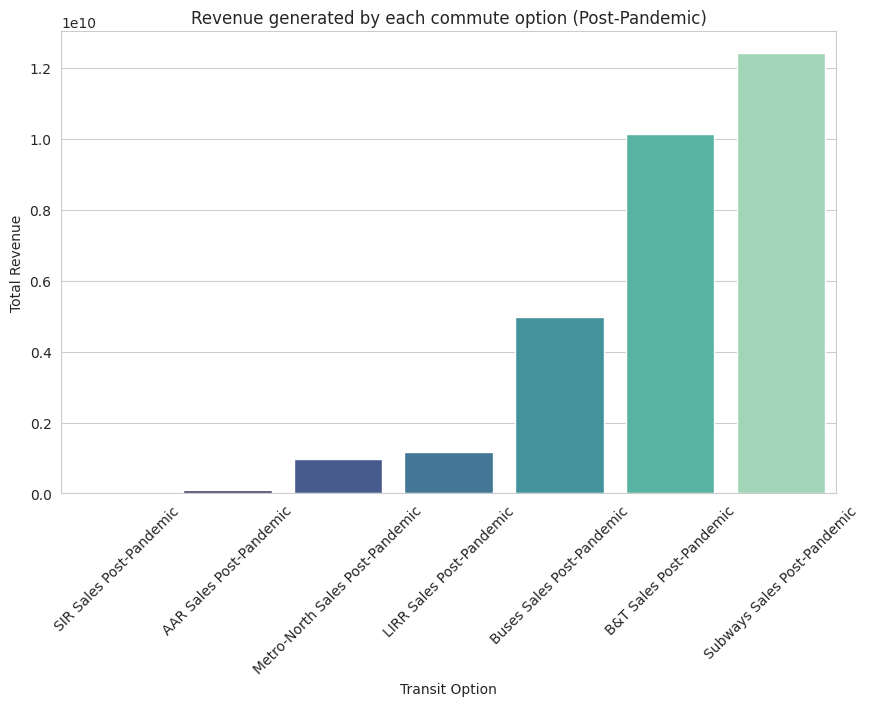

In [159]:
columns = df_prices.columns[::2]

sns.set_style('whitegrid')
df_prices_pre = df_prices[columns].sum()
df_prices_pre = df_prices_pre.sort_values()
plt.figure(figsize = (10,6))
sns.barplot(x = df_prices_pre.index, y = df_prices_pre.values, palette = 'mako')
plt.title('Revenue generated by each commute option (Post-Pandemic)')
plt.xlabel('Transit Option')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.show()

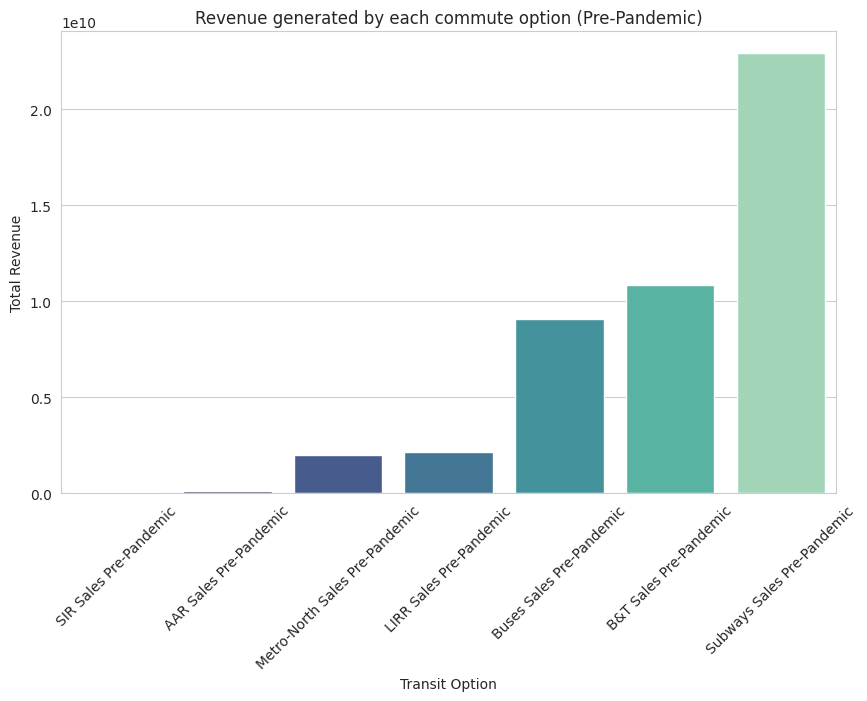

In [160]:
columns = df_prices.columns[1::2]

sns.set_style('whitegrid')
df_prices_pre = df_prices[columns].sum()
df_prices_pre = df_prices_pre.sort_values()
plt.figure(figsize = (10,6))
sns.barplot(x = df_prices_pre.index, y = df_prices_pre.values, palette = 'mako')
plt.title('Revenue generated by each commute option (Pre-Pandemic)')
plt.xlabel('Transit Option')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.show()

------
### Time Series Analysis

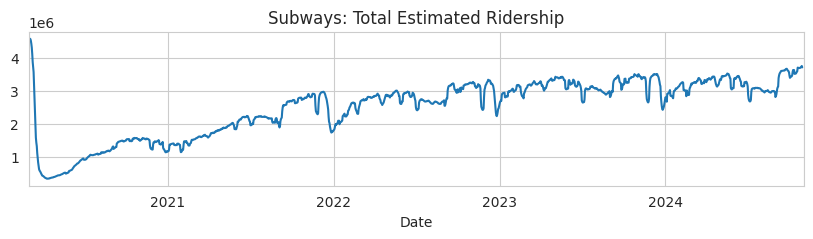

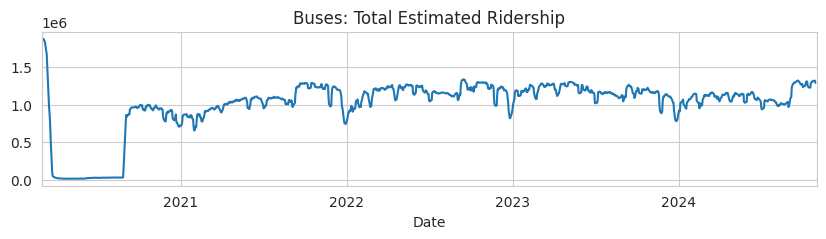

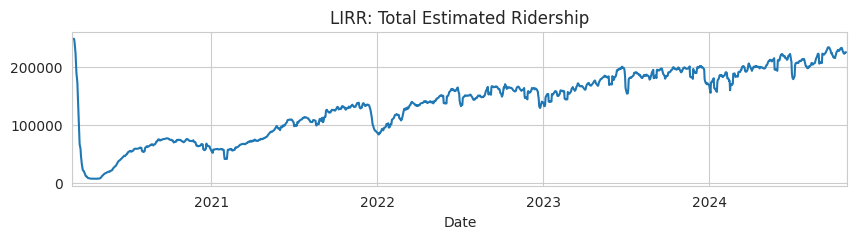

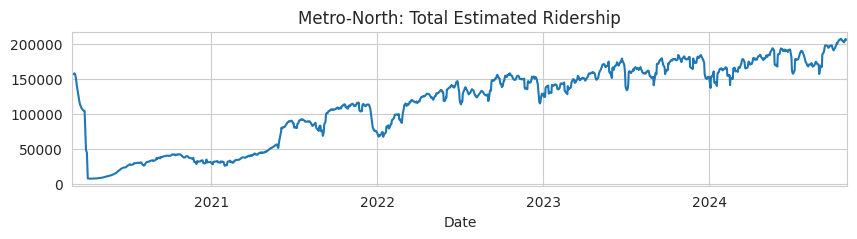

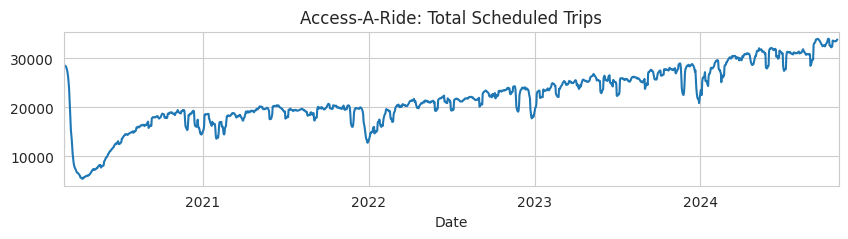

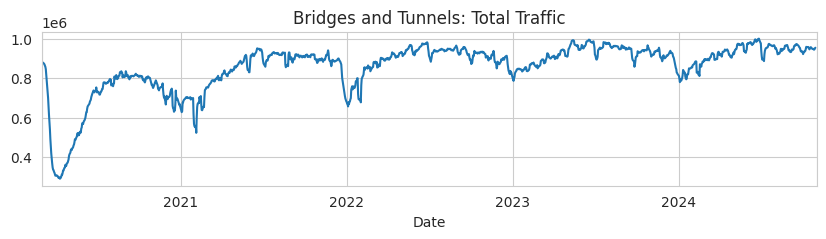

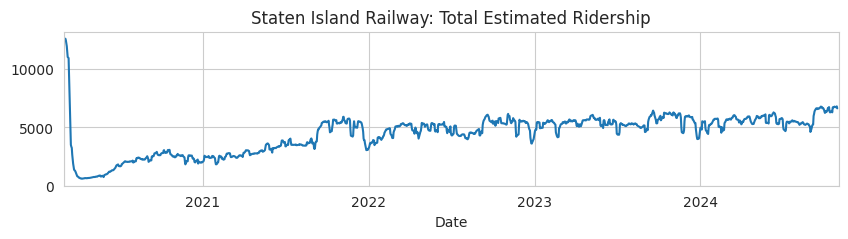

In [161]:
#Decomposing the transit records
from statsmodels.tsa.seasonal import seasonal_decompose
for i in df1.columns[::2]:
  plt.figure(figsize = (10,2))
  decompose = seasonal_decompose(df1[i],model='additive', period=7)
  decompose.trend.plot()
  plt.title(i)
  plt.show()

In [162]:
#Time Series forecasting for subways
df_time_series = df1['Subways: Total Estimated Ridership'].reset_index()
df_time_series.rename(columns =  {'Date':'ds','Subways: Total Estimated Ridership':'y'}, inplace = True)
m = Prophet()
m.fit(df_time_series)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz273rua/qzjmqbsi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz273rua/mzph31_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65223', 'data', 'file=/tmp/tmptz273rua/qzjmqbsi.json', 'init=/tmp/tmptz273rua/mzph31_w.json', 'output', 'file=/tmp/tmptz273rua/prophet_models55zmroo/prophet_model-20250117145741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [163]:
#Making a data frame with future dates for the prediction
future = m.make_future_dataframe(periods=365)
future.tail()

ds
2066 2025-10-27
2067 2025-10-28
2068 2025-10-29
2069 2025-10-30
2070 2025-10-31

In [164]:
#Forecasting the ridership measure for the next year
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2066 2025-10-27  3.830179e+06  3.240728e+06  4.411038e+06
2067 2025-10-28  4.164664e+06  3.529259e+06  4.769744e+06
2068 2025-10-29  4.232201e+06  3.617789e+06  4.831101e+06
2069 2025-10-30  4.183157e+06  3.560112e+06  4.770164e+06
2070 2025-10-31  4.027229e+06  3.438214e+06  4.661860e+06

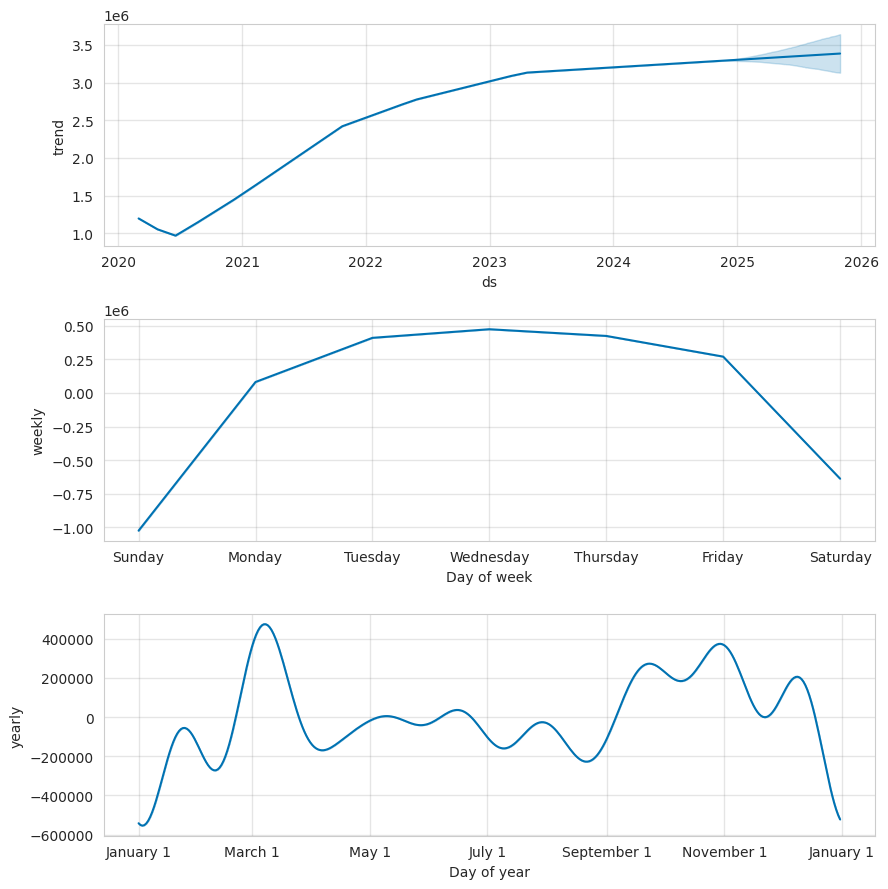

In [165]:
#Plotting the components of the forecasts
fig2 = m.plot_components(forecast)

In [166]:
#Creating an interactive plot for the predictions
plot_plotly(m, forecast)

-----
### Time Series Component breakdown for each transit option

In [167]:
columns = df1.columns[::2]
columns

Index(['Subways: Total Estimated Ridership',
       'Buses: Total Estimated Ridership', 'LIRR: Total Estimated Ridership',
       'Metro-North: Total Estimated Ridership',
       'Access-A-Ride: Total Scheduled Trips',
       'Bridges and Tunnels: Total Traffic',
       'Staten Island Railway: Total Estimated Ridership'],
      dtype='object')

In [168]:
#Creating a function which takes the column name and plots the forecast and components.
def create_time_series(col):
  df_time_series = df1[col].reset_index()
  df_time_series.rename(columns =  {'Date':'ds',df_time_series.columns[1]:'y'}, inplace = True)
  m = Prophet()
  m.fit(df_time_series)

  #Making a data frame with future dates for the prediction
  future = m.make_future_dataframe(periods=365)
  future.tail()

  #Forecasting the ridership measure for the next year
  forecast = m.predict(future)
  forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

  #Plotting the components of the forecasts
  fig = m.plot_components(forecast)
  fig1 = m.plot(forecast)
  plt.title(col)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz273rua/e7_es_k0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz273rua/lhgzr77f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44192', 'data', 'file=/tmp/tmptz273rua/e7_es_k0.json', 'init=/tmp/tmptz273rua/lhgzr77f.json', 'output', 'file=/tmp/tmptz273rua/prophet_modeljeiv6st2/prophet_model-20250117145746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz

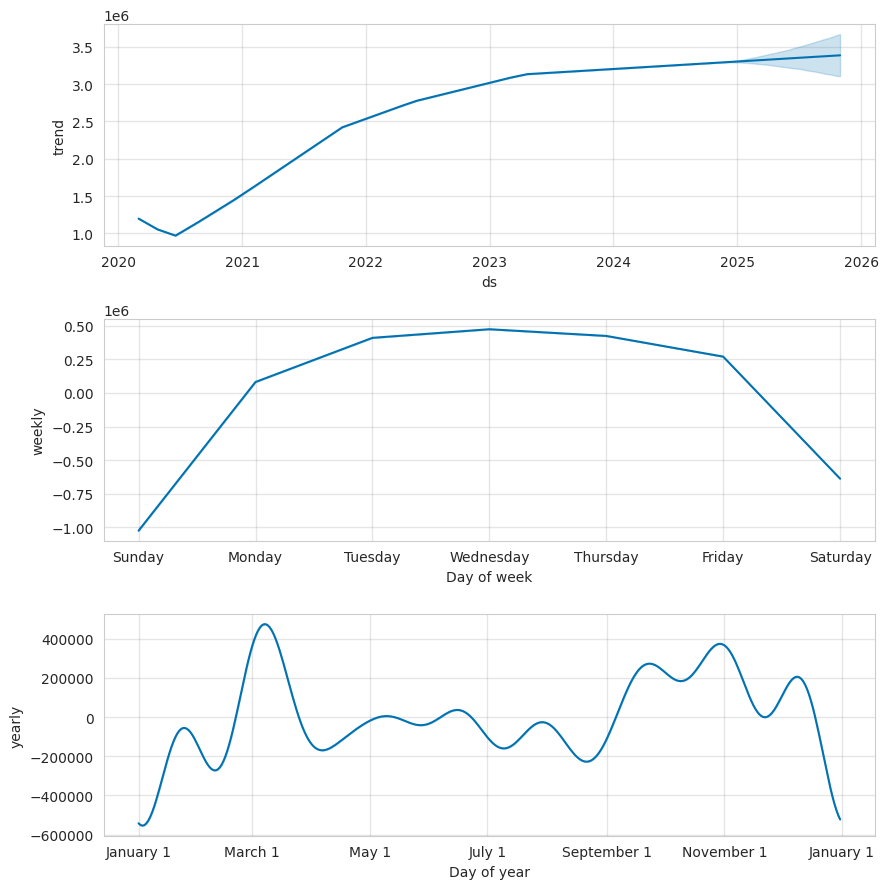

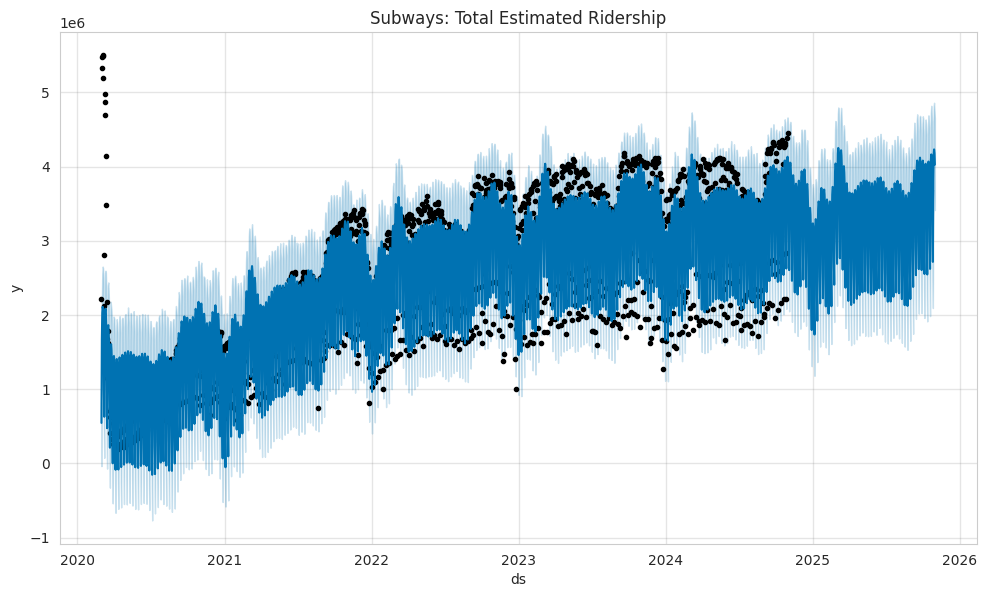

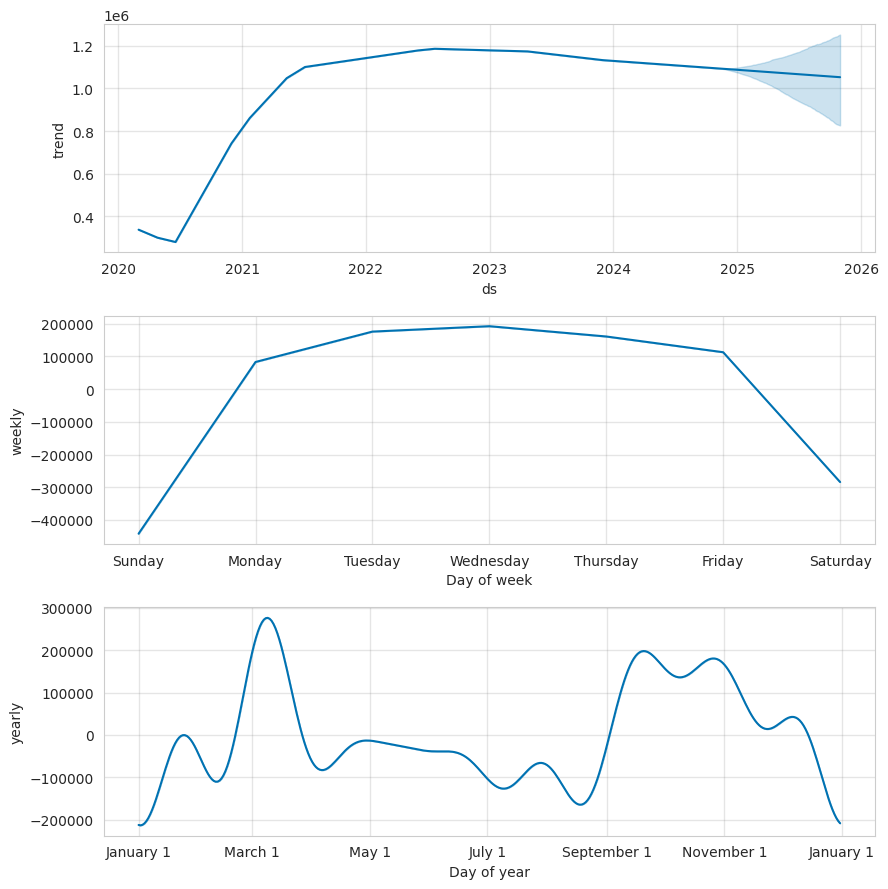

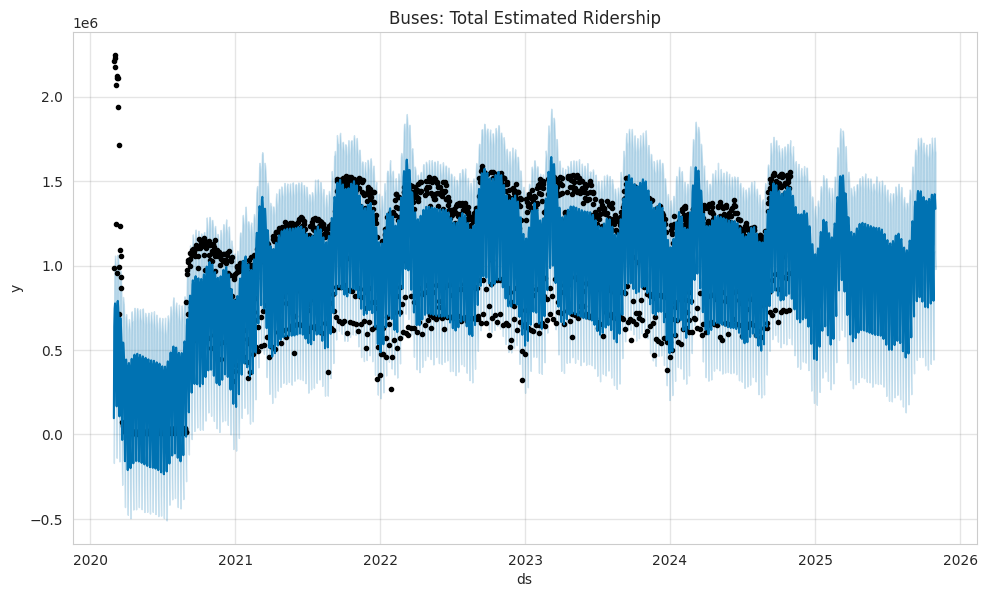

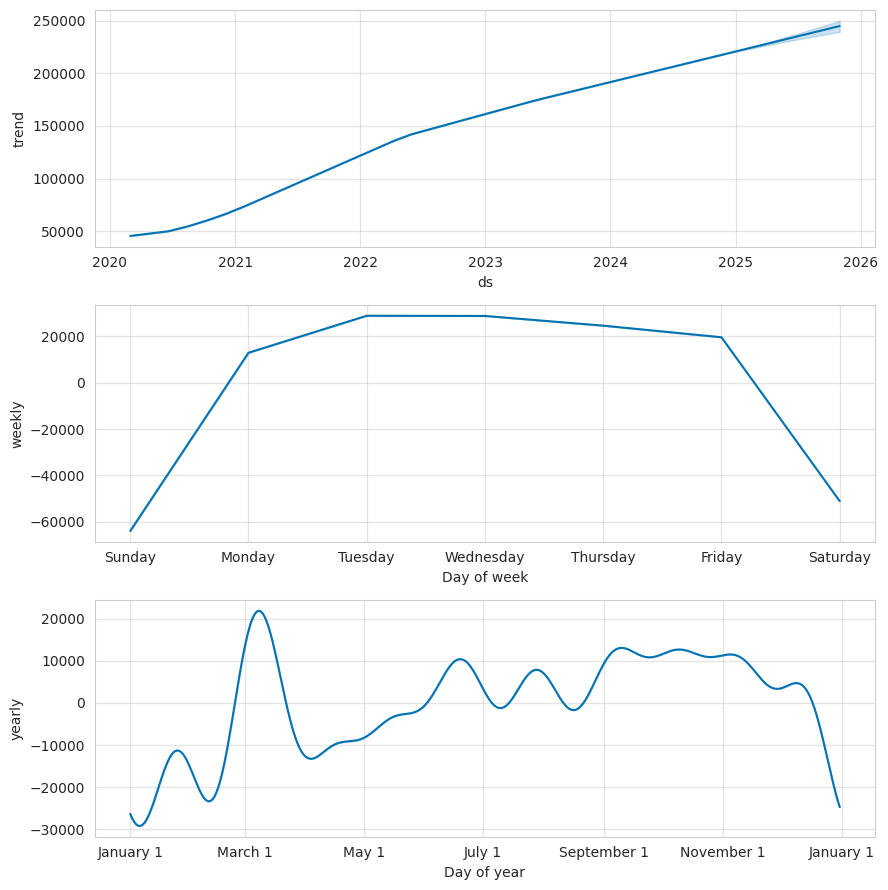

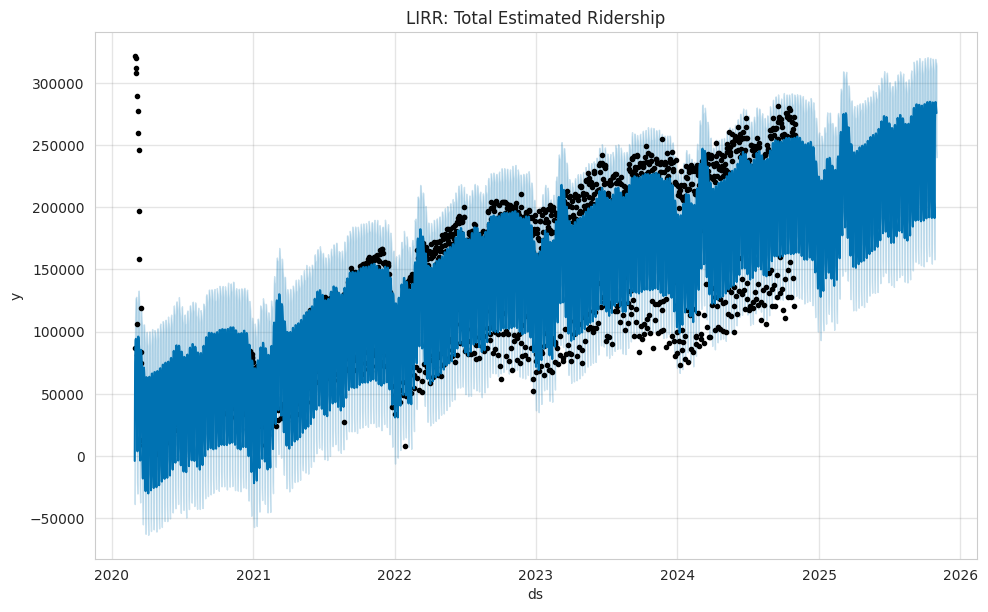

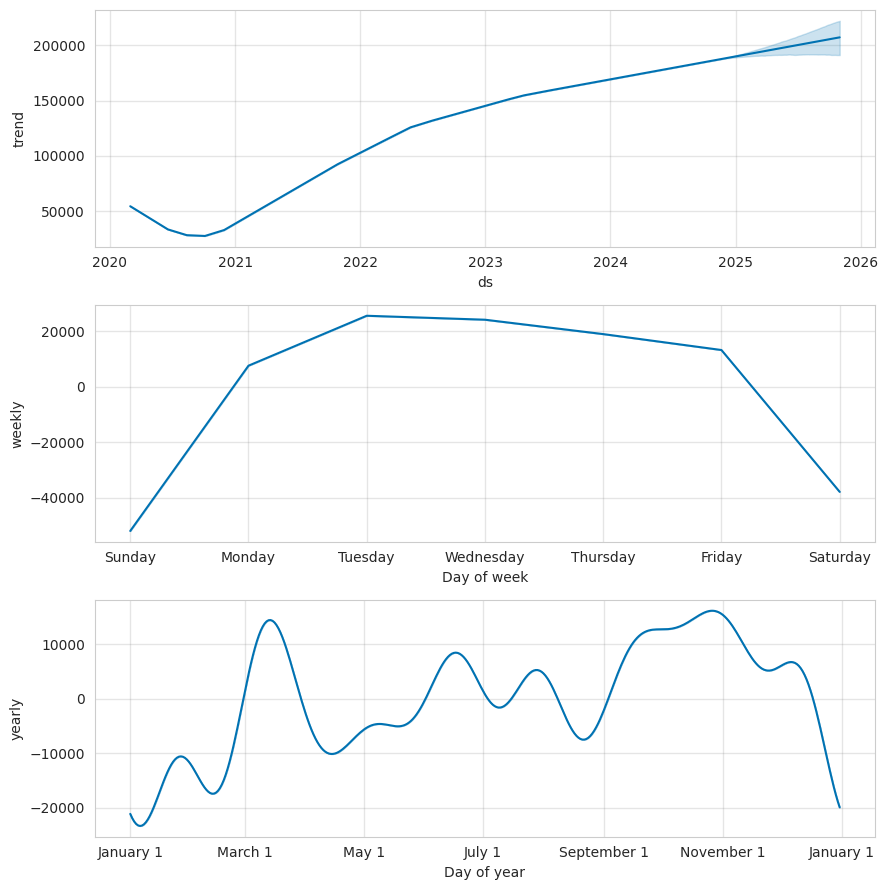

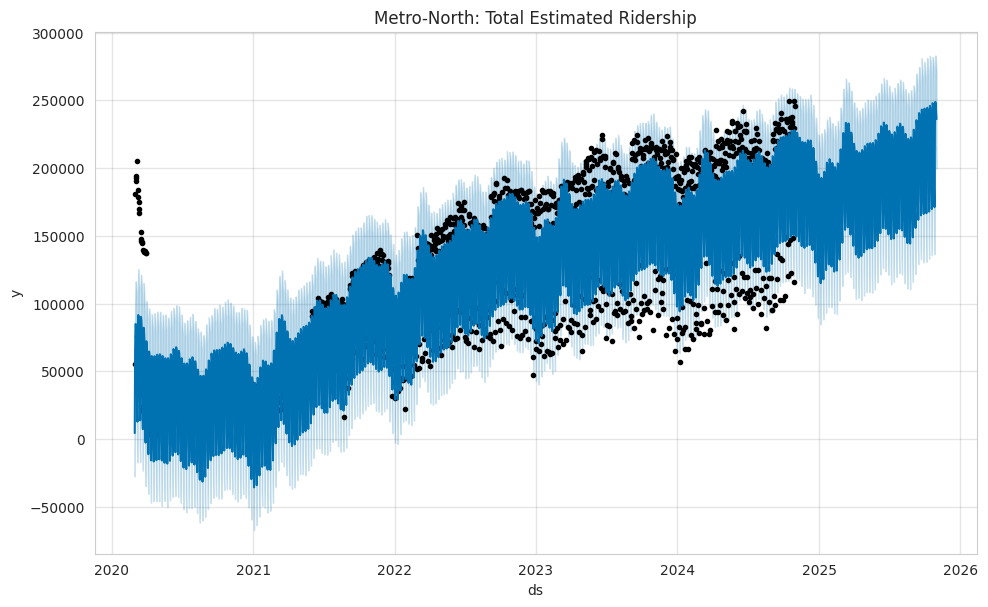

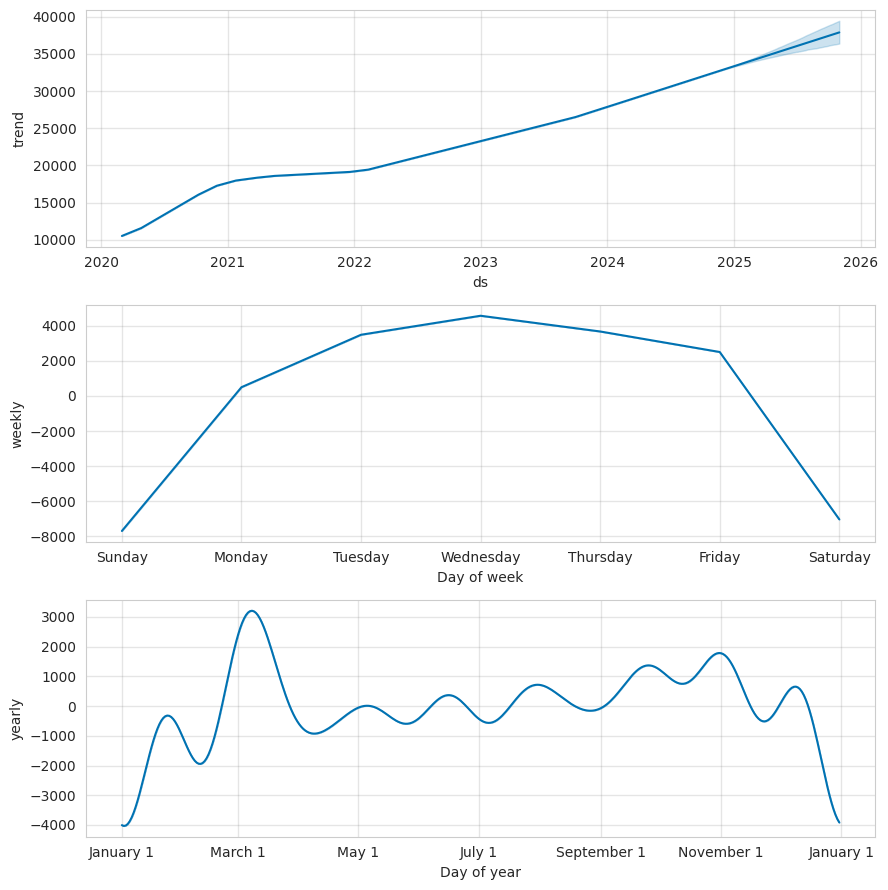

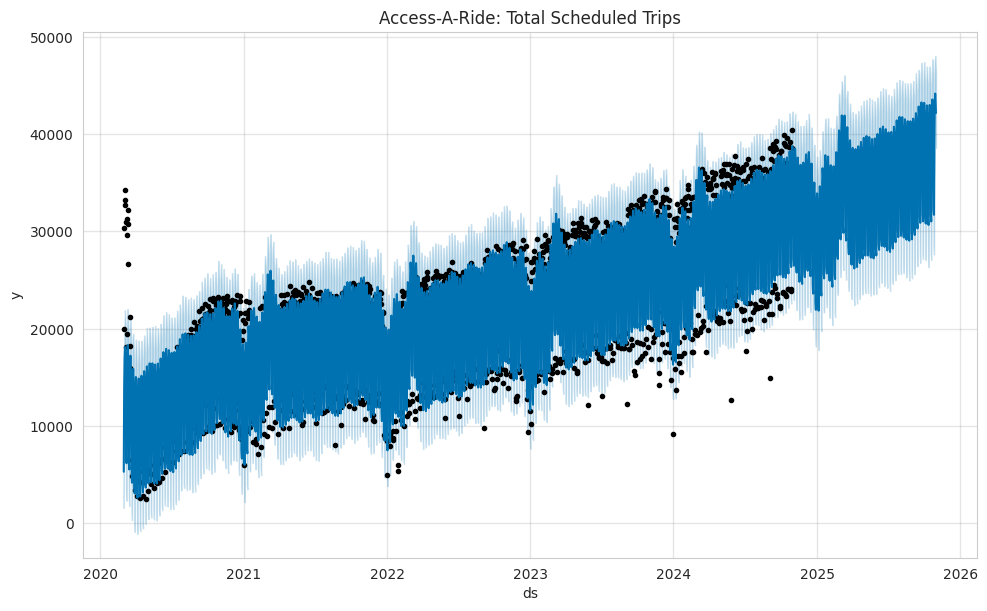

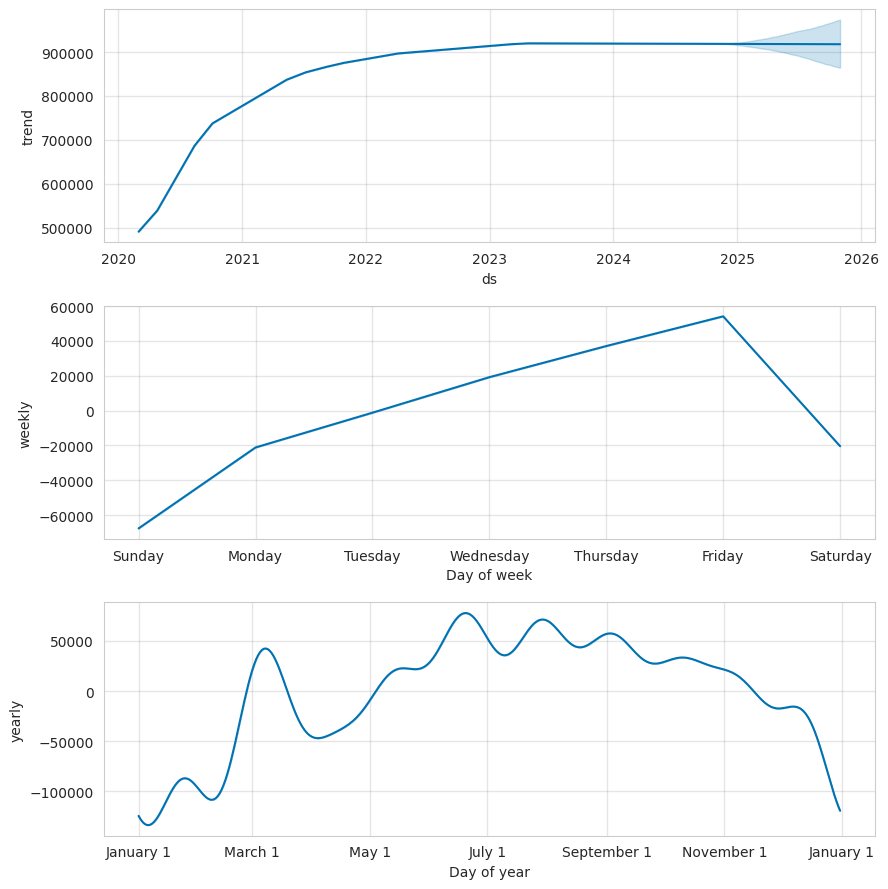

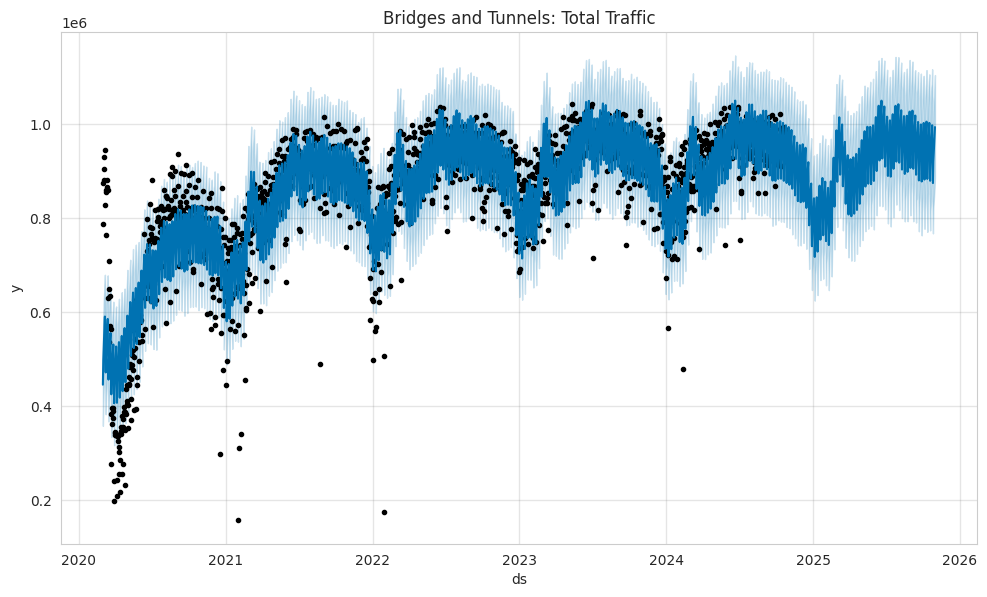

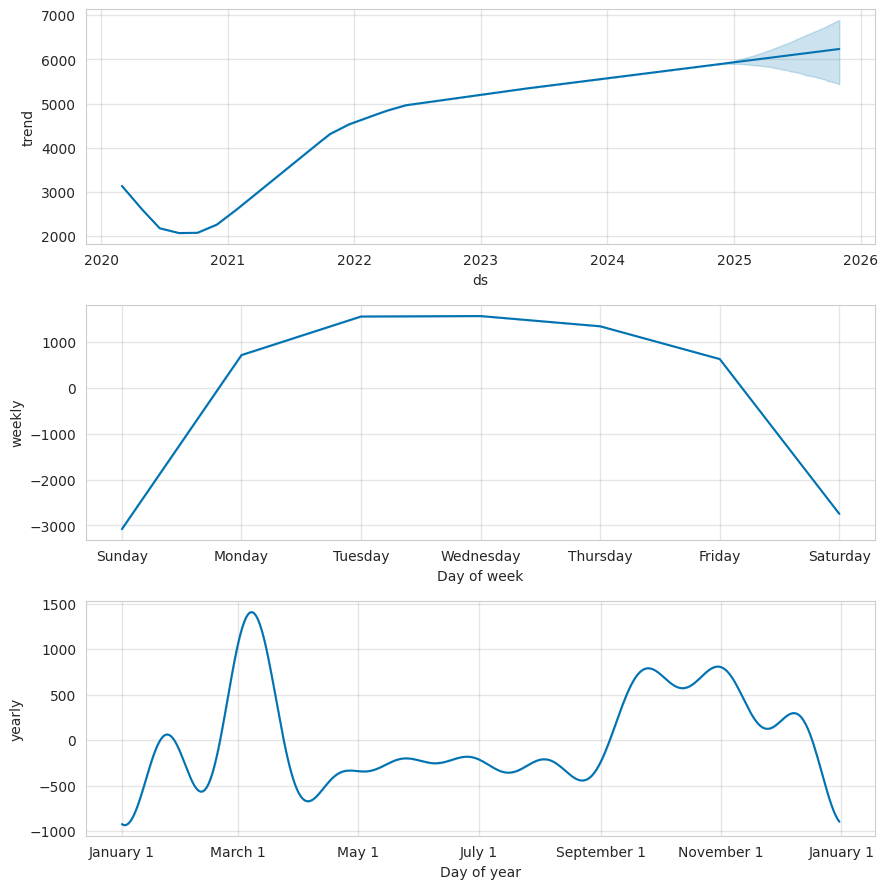

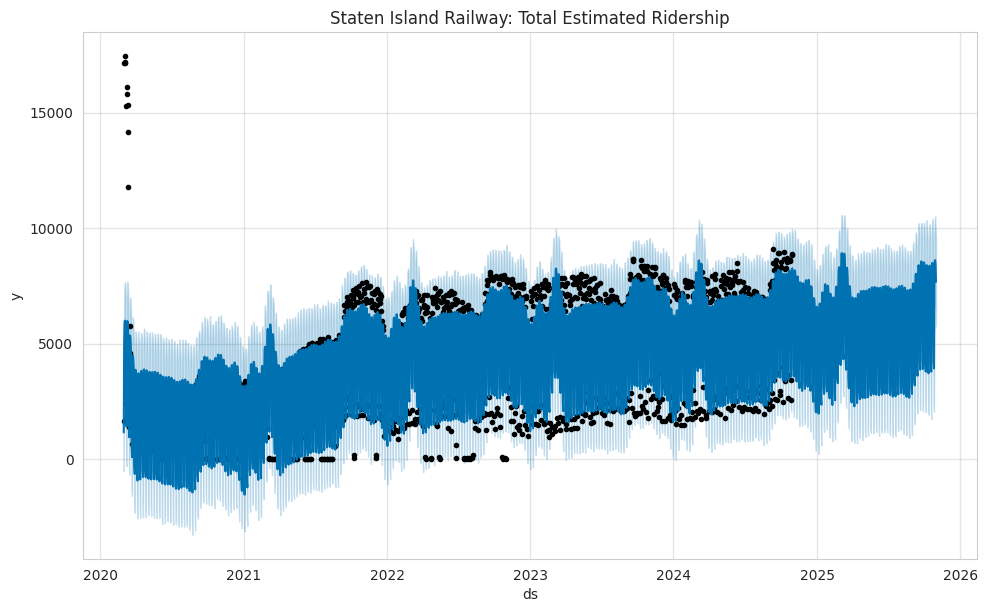

In [169]:
columns = df1.columns[::2]
for i in columns:
  create_time_series(i)